In [56]:
import pandas as pd
import numpy as np
import matplotlib as plt
import altair as alt
alt.data_transformers.enable('json')#
alt.renderers.enable('notebook')

DataTransformerRegistry.enable('json')

## Load Dataset

In [57]:
X_train = pd.read_csv('../data/train.csv')
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,35,Private,204621,Assoc-acdm,12,Divorced,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
1,36,Private,250807,11th,7,Never-married,Craft-repair,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2,21,Private,273403,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States,<=50K
3,56,Private,261232,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,20,Private,33644,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


In [58]:
X_train.columns = X_train.columns.str.replace('-', '_') 

numerical = ['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']
categorical = ['workclass','education','marital_status','occupation','relationship','race','sex','native_country','target']

# Getting rid of blanks at the start of categorical features
X_train[categorical] = X_train[categorical].apply(lambda x: x.str.strip())

## Exploring data

In [59]:
X_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.545416,1.898294e+05,10.077242,1039.185772,87.548718,40.386248
std,13.666343,1.056574e+05,2.573230,7167.150640,403.647262,12.395259
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369922e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [60]:
print("The number of unique workclass is: {0}".format(X_train['workclass'].unique().shape[0]))
print("The categories are:\n {0}".format(X_train['workclass'].unique()))

The number of unique workclass is: 9
The categories are:
 ['Private' 'Self-emp-inc' 'Local-gov' 'Self-emp-not-inc' '?' 'State-gov'
 'Federal-gov' 'Without-pay' 'Never-worked']


In [61]:
print("The number of unique education is: {0}".format(X_train['education'].unique().shape[0]))
print("The categories are:\n {0}".format(X_train['education'].unique()))

The number of unique education is: 16
The categories are:
 ['Assoc-acdm' '11th' 'Assoc-voc' 'HS-grad' '12th' 'Some-college'
 'Bachelors' 'Masters' 'Doctorate' '7th-8th' '1st-4th' 'Prof-school'
 '10th' '9th' '5th-6th' 'Preschool']


In [62]:
print("The number of unique marital_status is: {0}".format(X_train['marital_status'].unique().shape[0]))
print("The categories are:\n {0}".format(X_train['marital_status'].unique()))

The number of unique marital_status is: 7
The categories are:
 ['Divorced' 'Never-married' 'Widowed' 'Married-civ-spouse' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [63]:
print("The number of unique occupation is: {0}".format(X_train['occupation'].unique().shape[0]))
print("The categories are :\n {0}".format(X_train['occupation'].unique()))

The number of unique occupation is: 15
The categories are :
 ['Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial' 'Sales'
 'Protective-serv' 'Prof-specialty' '?' 'Farming-fishing'
 'Transport-moving' 'Handlers-cleaners' 'Machine-op-inspct' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces']


In [64]:
print("The number of unique relationship is: {0}".format(X_train['relationship'].unique().shape[0]))
print("The categories are :\n {0}".format(X_train['relationship'].unique()))

The number of unique relationship is: 6
The categories are :
 ['Own-child' 'Not-in-family' 'Unmarried' 'Husband' 'Wife' 'Other-relative']


In [65]:
print("The number unique race is: {0}".format(X_train['race'].unique().shape[0]))
print("The categories are:\n {0}".format(X_train['race'].unique()))

The number unique race is: 5
The categories are:
 ['White' 'Black' 'Other' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo']


In [66]:
print("The number unique sex is: {0}".format(X_train['sex'].unique().shape[0]))
print("The categories are:\n {0}".format(X_train['sex'].unique()))

The number unique sex is: 2
The categories are:
 ['Female' 'Male']


In [67]:
print("The number of unique native_country is: {0}".format(X_train['native_country'].unique().shape[0]))
print("The countries are:\n {0}".format(X_train['native_country'].unique()))

The number of unique native_country is: 41
The countries are:
 ['United-States' 'Poland' '?' 'Mexico' 'Canada' 'China' 'England' 'Haiti'
 'Italy' 'Jamaica' 'Portugal' 'France' 'Philippines' 'India' 'Iran'
 'Dominican-Republic' 'Puerto-Rico' 'Ireland' 'Scotland' 'Cuba' 'Thailand'
 'Yugoslavia' 'South' 'Cambodia' 'Germany' 'Vietnam' 'Guatemala' 'Peru'
 'Columbia' 'Japan' 'Ecuador' 'El-Salvador' 'Laos'
 'Outlying-US(Guam-USVI-etc)' 'Nicaragua' 'Taiwan' 'Trinadad&Tobago'
 'Greece' 'Honduras' 'Hong' 'Hungary']


In [68]:
print("Number of observations with income Class >50K $ = {0}".format(X_train['target'].value_counts()[1]))
print("Number of observations with income Class <=50K $ = {0}".format(X_train['target'].value_counts()[0]))

Number of observations with income Class >50K $ = 6270
Number of observations with income Class <=50K $ = 19778


## Observations

- Categorical variables `native_country`, `occupation` and `workclass` have `?` in some places.
- Outliers are present in numerical variables `capital_gain` and `capital_loss`.
- Target classes aren't evenly distributed.

## Relation among different variables

In [69]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,35,Private,204621,Assoc-acdm,12,Divorced,Other-service,Own-child,White,Female,0,0,40,United-States,<=50K
1,36,Private,250807,11th,7,Never-married,Craft-repair,Not-in-family,Black,Female,0,0,40,United-States,<=50K
2,21,Private,273403,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Female,0,0,50,United-States,<=50K
3,56,Private,261232,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,20,Private,33644,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K


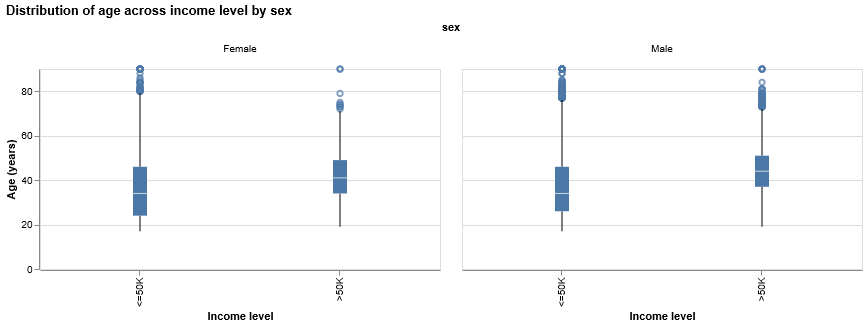

In [81]:
# Plot distribution of age across income level by sex
alt.data_transformers.disable_max_rows()

p1 = alt.Chart(X_train).mark_boxplot().encode(
    alt.X('target:O', title='Income level'),
    alt.Y('age:Q', title='Age (years)'),
    facet='sex:N'
).properties(
    title='Distribution of age across income level by sex',
    width=400,
    height=200
)
p1

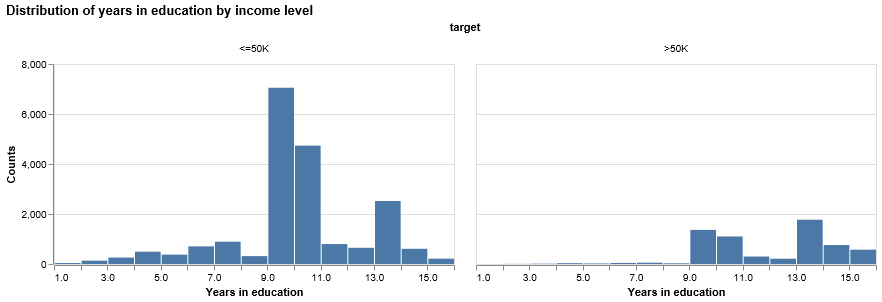

In [82]:
# Plot distribution of years in education by income level
p2 = alt.Chart(X_train).mark_bar().encode(
    alt.X('education_num:Q', bin=alt.Bin(step=1), title='Years in education'),
    alt.Y('count()', title='Counts'),
    facet='target:N'
).properties(
    title='Distribution of years in education by income level',
    width=400,
    height=200
)
p2

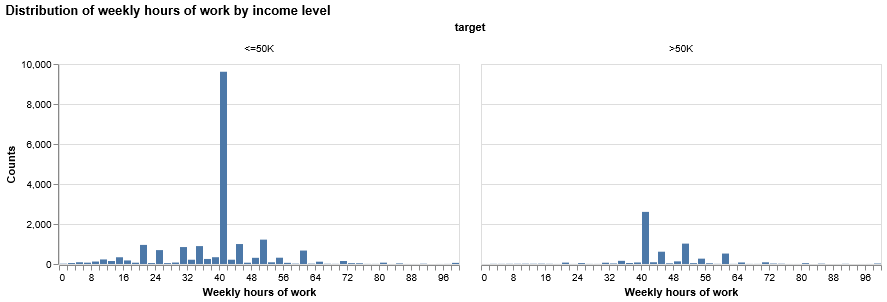

In [83]:
# Plot distribution of weekly hours of work by income level 
p3 = alt.Chart(X_train).mark_bar().encode(
    alt.X('hours_per_week:Q', bin=alt.Bin(step=2), title='Weekly hours of work'),
    alt.Y('count()', title='Counts'),
    facet='target:N'
).properties(
    title='Distribution of weekly hours of work by income level',
    width=400,
    height=200
)
p3

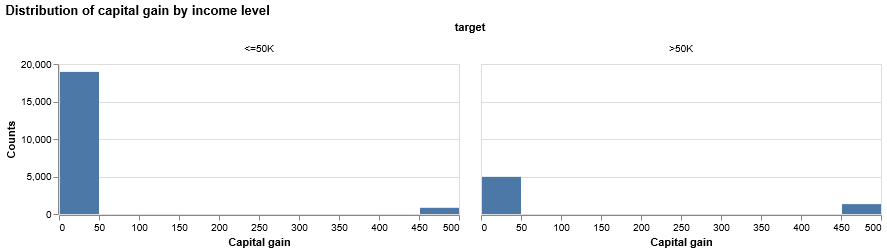

In [84]:
# Plot distribution of capital gain by income level
p4 = alt.Chart(X_train).mark_bar().encode(
    alt.X('capital_gain:Q', bin=alt.Bin(extent=[0, 500], step=50), title='Capital gain'),
    alt.Y('count()', title='Counts'),
    facet='target:N'
).properties(
    title='Distribution of capital gain by income level',
    width=400,
    height=150
)

# Plot distribution of capital loss by income level
p5 = alt.Chart(X_train).mark_bar().encode(
    alt.X('capital_loss:Q', bin=alt.Bin(extent=[0, 1000], step=50), title='Capital loss'),
    alt.Y('count()', title='Counts'),
    facet='target:N'
).properties(
    title='Distribution of capital loss by income level',
    width=400,
    height=150
)

p4

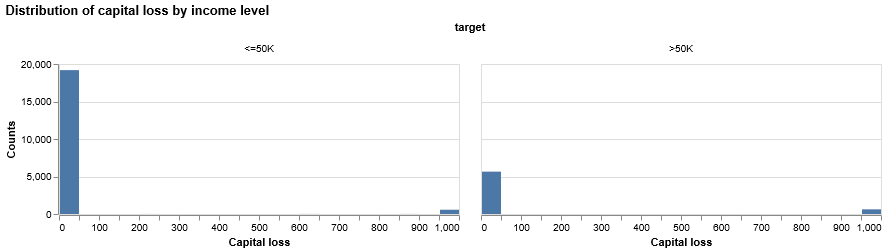

In [85]:
p5

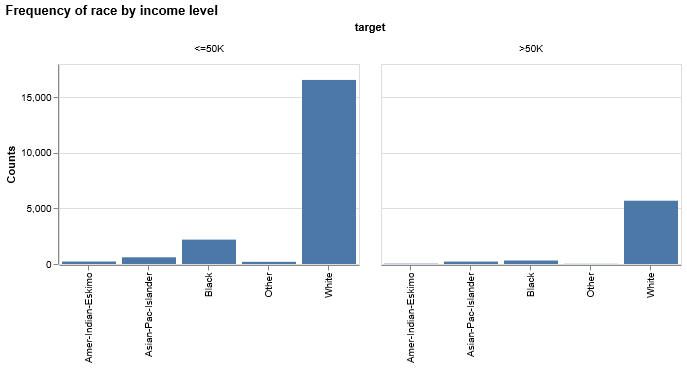

In [86]:
# Barplot showing frequency of different races by income level 
p6 = alt.Chart(X_train).mark_bar().encode(
    alt.X('race:O', title=None),
    alt.Y('count()', title='Counts'),
    facet='target:N'
).properties(
    title='Frequency of race by income level',
    width=300,
    height=200
)
p6

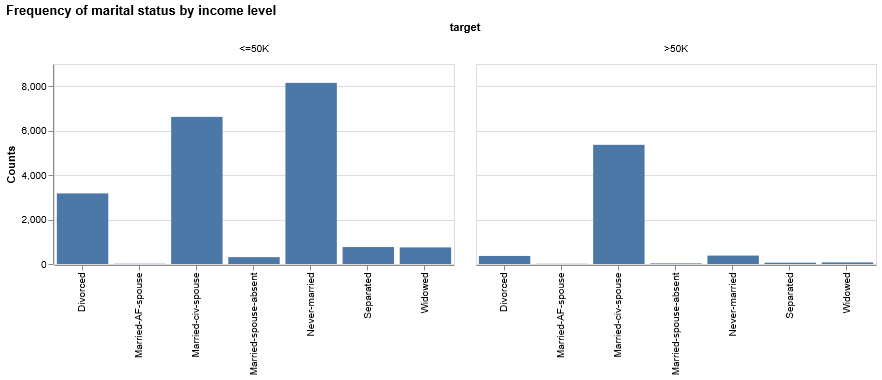

In [87]:
# Barplot showing frequency of different marital statuses by income level 
p7 = alt.Chart(X_train).mark_bar().encode(
    alt.X('marital_status:O', title=None),
    alt.Y('count()', title='Counts'),
    facet='target:N'
).properties(
    title='Frequency of marital status by income level',
    width=400,
    height=200
)
p7

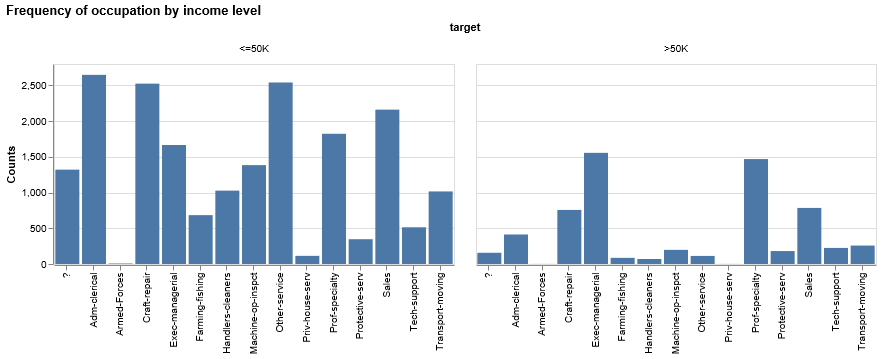

In [88]:
# Barplot showing frequency of occupation by income level 
p8 = alt.Chart(X_train).mark_bar().encode(
    alt.X('occupation:O', title=None),
    alt.Y('count()', title='Counts'),
    facet='target:N'
).properties(
    title='Frequency of occupation by income level',
    width=400,
    height=200
)
p8

## Further observations 
- Median age of the high income class (>50K) is higher than that of the low income class (<=50K) for both sexes. This is unsurprising as income tends to increase with age.  
- Almost every individual in the high income class received more than 9 years of education.
- Across both income classes, a 40-hour workweek occurs most frequently.
- With respect to capital gain and loss, in both income groups, individuals are either at the low end or high end - observations are polarized. This probably explains our observations from calling the `describe` function earlier.
- Across both income classes, `White` is the racial majority, followed by `Black`.
- In the low income class, the most frequently occurring marital status is `Never-married` followed by`Married-civ-spouse` and `Divorced`. On the other hand, the high income class is dominated by `Married` individuals. Moreover, relatively speaking, there is a smaller number of `Divorced` individuals in the high income class.
- `Exec-managerial` is the most frequently occurring occupation followed by `Prof-speciality` in the high income class.